# Proyecto #3
## Integrantes Josue Campos, Brian Laguna

## 2.3.Carga de datos


In [16]:
import pandas as pd # libreria para estructura de datos dataframe
import matplotlib.pyplot as plt # permite crear graficos
import seaborn as sns # libreria permite crear graficos mas elavorados
from sklearn.preprocessing import StandardScaler, MinMaxScaler #  estandariza los datos con media 0 y desviación estándar 1.,  transforma los datos para que estén entre 0 y 1.
from google.colab import files # permite subir archivos a colab y descargar

In [17]:
url = 'https://github.com/Brian1522/Script_EDA_Python/raw/main/datos/datos_supermarket.csv'
df = pd.read_csv(url,delimiter=';')
df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


# 4.Funciones Basicos

In [18]:
# funciones básicas para visualizar las principales características del conjunto de datos.
print("\n--- Información básica del dataset ---")
# 1.Muestra las principales características del conjunto de datos
print(f"Filas: {df.shape[0]}, Columnas: {df.shape[1]}")

# 2.Ver las primeras filas del Dataset

print("\n--- Primeras 5 Filas ---")
print(df.head())

# 3.Obtener información general del Dataset
print("\n--- Información general del dataset ---")
print(df.info())

# 4.Resumen estadístico de las columnas numéricas
print("\n--- Información de columnas numéricas---")
print(df.describe())

# 5.Contar valores únicos en cada columna
print("\n--- Valores únicos en cada columna ---")
print(df.nunique())

# 6.Verificar si existen valores nulos
print("\n--- Busca valores nulos ---")
print(df.isnull().sum())

# 7.Mostrar las dimensiones del Dataset
print("\n--- Muestra las dimenciones del dataset ---")
print(df.shape)

# 8.Tipos de datos de cada columna
print("\n--- Muestra los tipos de datos ---")
df.dtypes

# 9. Correlación entre variables numéricas
# Variables numéricas
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns
print("\n=== VARIABLES NUMÉRICAS ===")
print(numeric_cols)



--- Información básica del dataset ---
Filas: 1000, Columnas: 17

--- Primeras 5 Filas ---
    Invoice ID Branch       City Customer type  Gender  \
0  750-67-8428      A     Yangon        Member  Female   
1  226-31-3081      C  Naypyitaw        Normal  Female   
2  631-41-3108      A     Yangon        Normal    Male   
3  123-19-1176      A     Yangon        Member    Male   
4  373-73-7910      A     Yangon        Normal    Male   

             Product line  Unit price  Quantity   Tax 5%     Total       Date  \
0       Health and beauty       74.69         7  26.1415  548.9715   1/5/2019   
1  Electronic accessories       15.28         5   3.8200   80.2200   3/8/2019   
2      Home and lifestyle       46.33         7  16.2155  340.5255   3/3/2019   
3       Health and beauty       58.22         8  23.2880  489.0480  1/27/2019   
4       Sports and travel       86.31         7  30.2085  634.3785   2/8/2019   

    Time      Payment    cogs  gross margin percentage  gross income  Ra

# 5. Cambio de columnas a español. Y punto 9 conversiones de tipos de datos de las variable a español.

In [19]:
# 4. Cambio de columnas a español
# mapea las columnas para nombrarlas a español
column_mapping = {
    'Invoice ID': 'id_factura',
    'Branch': 'sucursal',
    'City': 'ciudad',
    'Customer type': 'tipo_cliente',
    'Gender': 'sexo',
    'Product line': 'linea_producto',
    'Unit price': 'precio_unitario',
    'Quantity': 'cantidad',
    'Tax 5%': 'impuesto_5',
    'Total': 'total',
    'Date': 'fecha',
    'Time': 'hora',
    'Payment': 'tipo_pago',
    'cogs': 'cogs',
    'gross margin percentage': 'porcentaje_margen_bruto',
    'gross income': 'ingresos_brutos',
    'Rating': 'clasificacion'
}
# Crear un nuevo dataframe con los nombres traducidos
df_limpio = df.rename(columns=column_mapping)
print(df.head())

print("\n Nombres de columnas en df_limpio:")
print(df_limpio.head())
print(df_limpio.columns.tolist())

# cambio de datos a espanol
# sexo = Female = Femenino, Male= Masculino

print(df_limpio['sexo'].unique())
df_limpio['sexo'] = df_limpio['sexo'].replace({'Female': 'Femenino', 'Male': 'Masculino'}) # cambia nombre de datos a espanol
print(df_limpio['sexo'].unique())
# Cambio de tipo_cliente = Menber= Miembro
print(df_limpio['tipo_cliente'].unique())
df_limpio['tipo_cliente'] = df_limpio['tipo_cliente'].replace({'Member': 'Miembro', 'Normal': 'Normal'})
print(df_limpio['tipo_cliente'].unique())

# linea_producto.
print(df_limpio['linea_producto'].unique())
df_limpio['linea_producto'] = df_limpio['linea_producto'].replace({
    'Health and beauty': 'Salud y belleza',
    'Electronic accessories': 'Accesorios electrónicos',
    'Home and lifestyle': 'Hogar y estilo de vida',
    'Sports and travel': 'Deportes y viajes',
    'Food and beverages': 'Alimentos y bebidas',
    'Fashion accessories': 'Accesorios de moda'
})
print(df_limpio['linea_producto'].unique())

# Tipo pago
print(df_limpio['tipo_pago'].unique())
df_limpio['tipo_pago'] = df_limpio['tipo_pago'].replace({
    'Ewallet': 'Monedero electrónico',
    'Cash': 'Efectivo',
    'Credit card': 'Tarjeta de crédito'
})
print(df_limpio['tipo_pago'].unique())


    Invoice ID Branch       City Customer type  Gender  \
0  750-67-8428      A     Yangon        Member  Female   
1  226-31-3081      C  Naypyitaw        Normal  Female   
2  631-41-3108      A     Yangon        Normal    Male   
3  123-19-1176      A     Yangon        Member    Male   
4  373-73-7910      A     Yangon        Normal    Male   

             Product line  Unit price  Quantity   Tax 5%     Total       Date  \
0       Health and beauty       74.69         7  26.1415  548.9715   1/5/2019   
1  Electronic accessories       15.28         5   3.8200   80.2200   3/8/2019   
2      Home and lifestyle       46.33         7  16.2155  340.5255   3/3/2019   
3       Health and beauty       58.22         8  23.2880  489.0480  1/27/2019   
4       Sports and travel       86.31         7  30.2085  634.3785   2/8/2019   

    Time      Payment    cogs  gross margin percentage  gross income  Rating  
0  13:08      Ewallet  522.83                 4.761905       26.1415     9.1  
1  10:

#6.Datos Nulos

In [20]:
# Busqueda de valores Nulos (No se encuentra ningun valor)

# Verificar valores nulos
nulos = df_limpio.isnull().sum()

# Mostrar mensaje si no hay valores nulos
if nulos.sum() == 0:
  print("No hay valores nulos en el conjunto de datos df_limpio.")
else:
  # Gráfico de valores nulos si existen
  plt.figure(figsize=(10, 6))
  sns.heatmap(df_limpio.isnull(), cbar=False, cmap='viridis')
  plt.title('Valores Nulos en el Conjunto de Datos')
  plt.xlabel('Columnas')
  plt.ylabel('Filas')
  plt.show()

  print(f"Valores nulos por columna:\n{nulos}")


No hay valores nulos en el conjunto de datos df_limpio.


# Visualizacion de Variables Categoricas


=== VISUALIZACION VARIABLES CATEGORICAS ===



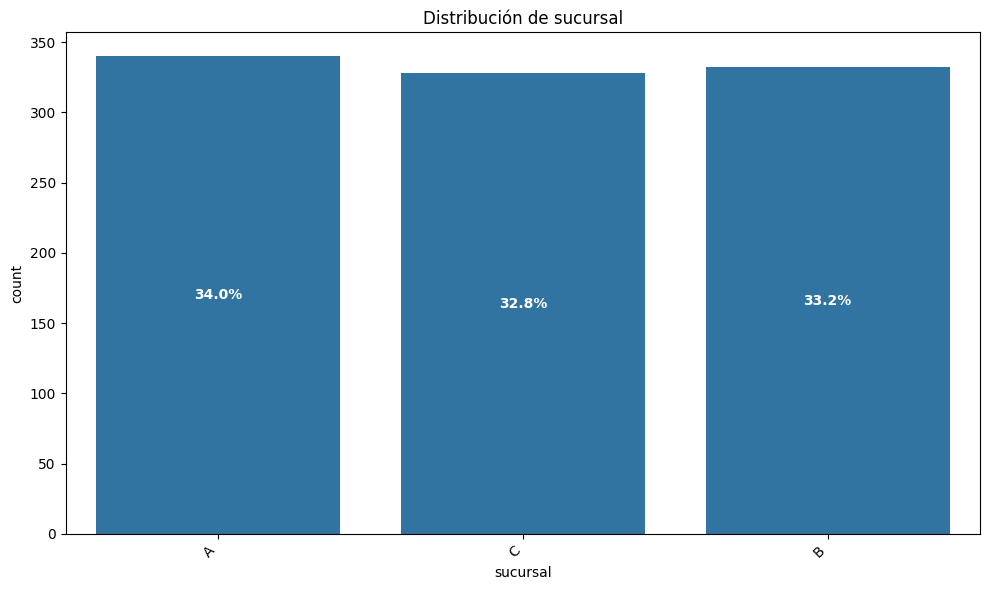

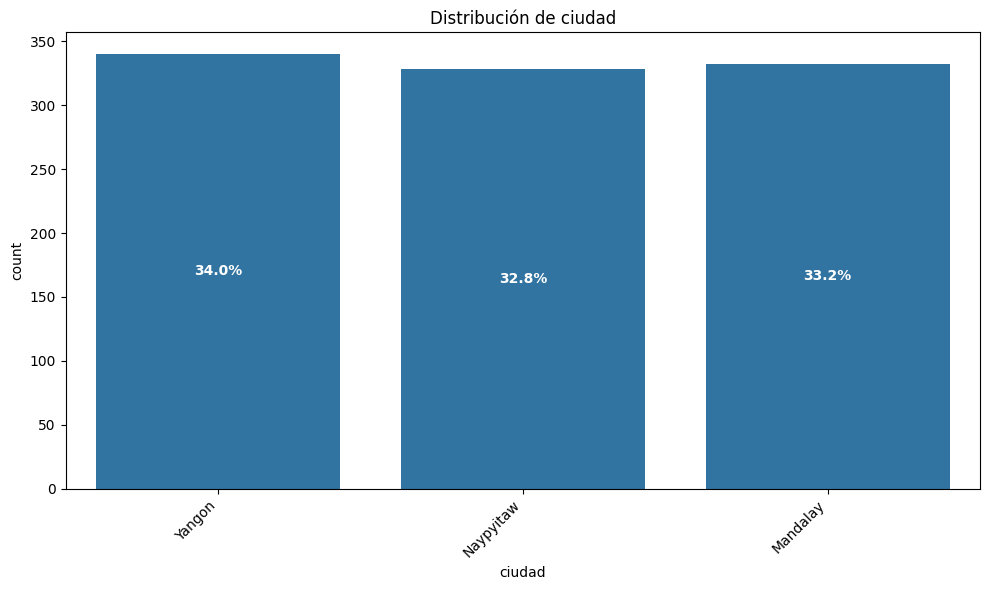

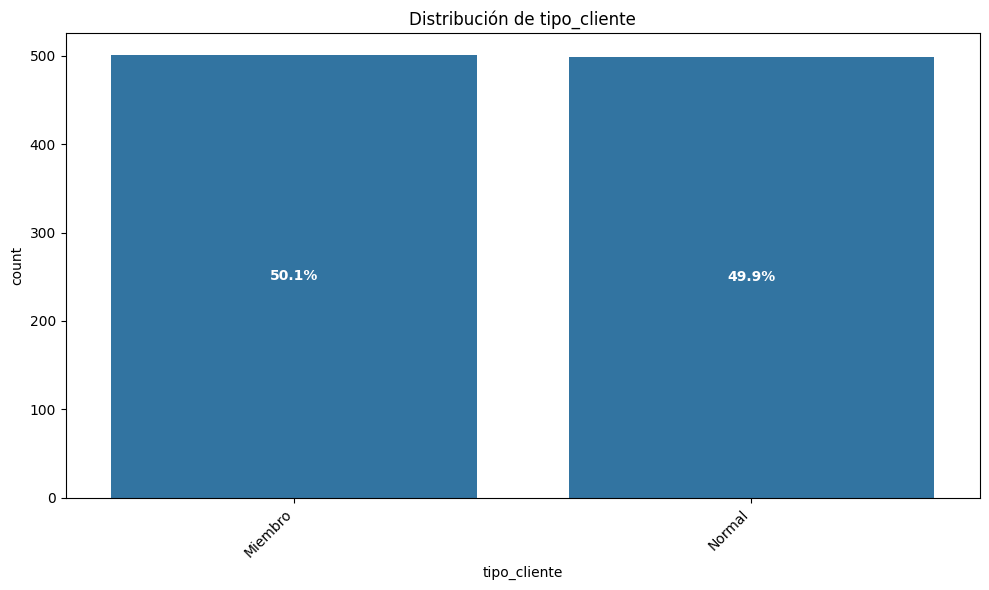

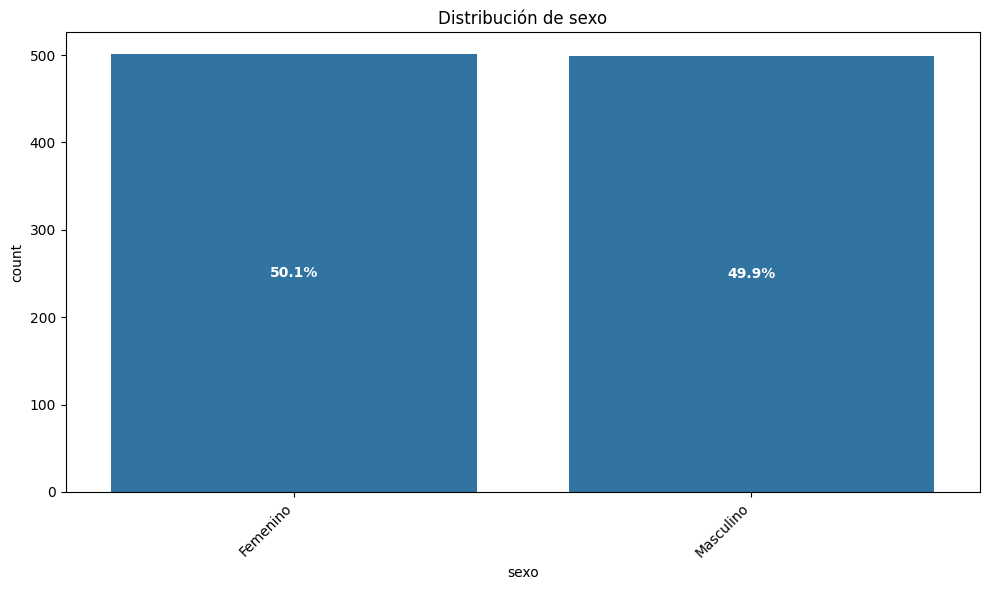

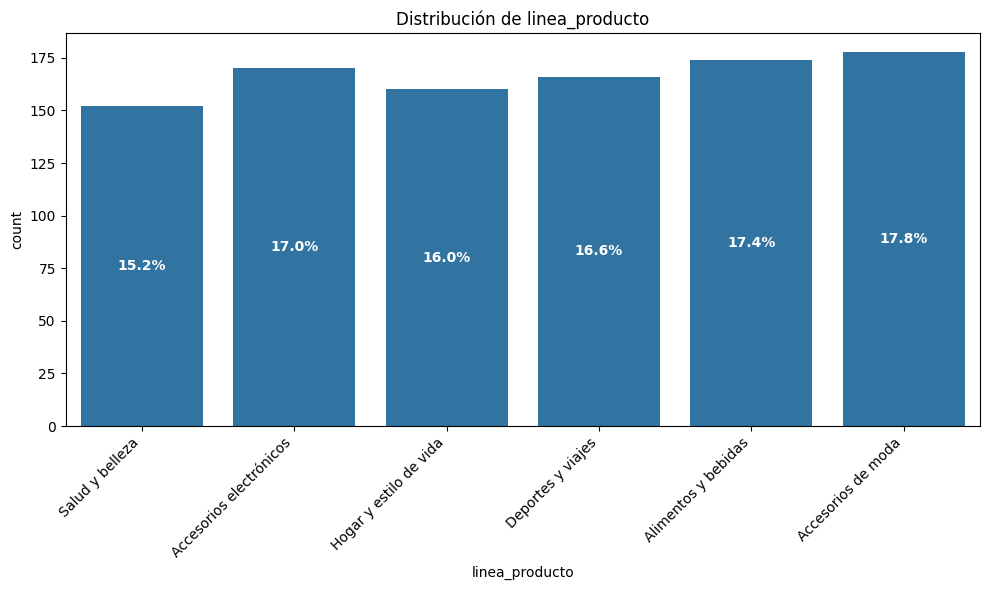

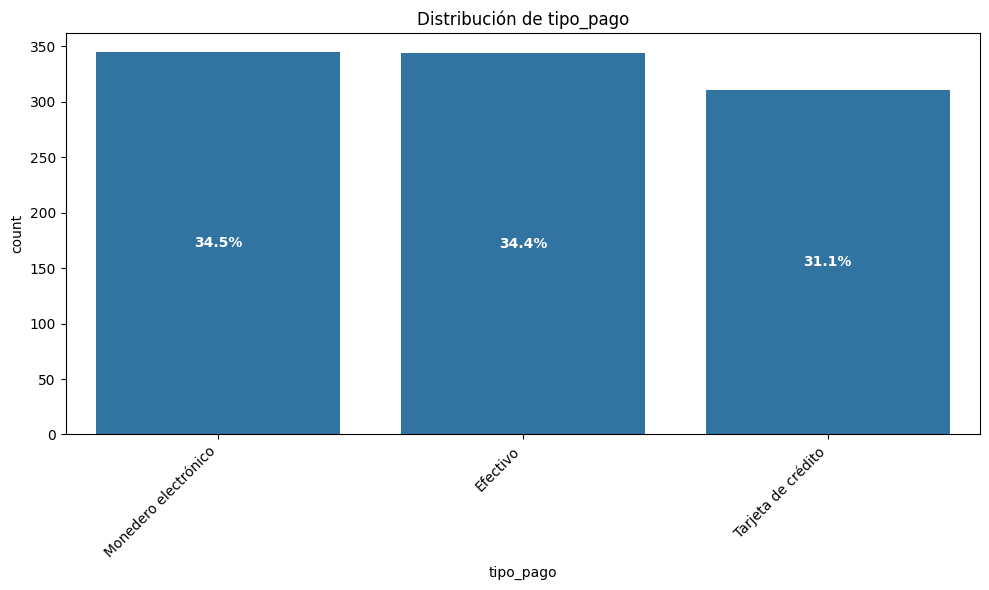

In [21]:
# Graficas categoricas del total o de varible categoricas
# Se excluyen las  columnnas id_factura, fecha,hora, ya que poseen muchos datos y no es comprendible el grafico.

# Variables categóricas
categorical_cols = df_limpio.select_dtypes(include=['object']).columns
print("\n=== VISUALIZACION VARIABLES CATEGORICAS ===\n")

for col in categorical_cols: # recorre las columnas cateoricas del dataframe df_limpio
    if col not in ['id_factura', 'fecha', 'hora']:
        plt.figure(figsize=(10, 6))
        ax = sns.countplot(x=col, data=df_limpio) # crear los graficos por categoria usa la libreria seaborn .ax

        # Título y rotación de etiquetas
        plt.title(f'Distribución de {col}')
        plt.xticks(rotation=45, ha='right')

        # Calcular porcentajes
        total = len(df_limpio)
        for p in ax.patches: # recorre las barras de los graficos la p hace referencia a las barras este permite ver la altura para colocar el  porcentaje de cada barra.
            count = p.get_height() # cuenta los elementos en cada categoria
            percentage = 100 * count / total # saca el porcentaje con respecto al total
            x = p.get_x() + p.get_width() / 2 # p.get_width() saca la cantidad de datos que tiene la barra
            y = p.get_height() #
            ax.text(
                x,
                y * 0.5,  # Posición vertical al 50% de la altura de la barra
                f'{percentage:.1f}%',
                ha='center',
                va='center',
                fontsize=10,
                color='white',  # el valor en % se mostrara en blanco
                fontweight='bold'
            )

        plt.tight_layout()
        plt.show()

# 7. Valores atipicos

In [22]:
# Seleccionar columnas numéricas

numeric_cols = df_limpio.select_dtypes(include=['float64', 'int64']).columns #busca las columnas numericas float y int y las guarda en numerics_cols
print("Columnas numéricas:")
print(numeric_cols.tolist())

# Calcular estadísticas para detección de outliers
for col in numeric_cols:
    q1 = df_limpio[col].quantile(0.25) #Q1: cuartil 25%
    q3 = df_limpio[col].quantile(0.75) # Q3: cuartil 75%
    iqr = q3 - q1 # Rango intercuartilico
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr

    outliers = df_limpio[(df_limpio[col] < lower_bound) | (df_limpio[col] > upper_bound)]
    #filtran todos los valores que están por debajo del límite inferior o por encima del superior.

    print(f"\n--- Análisis para {col} ---")
    print(f"Rango intercuartílico (IQR): {iqr}")
    print(f"Límite inferior: {lower_bound}")
    print(f"Límite superior: {upper_bound}")
    print(f"Número de outliers: {len(outliers)}")
    print(f"Porcentaje de outliers: {len(outliers)/len(df_limpio)*100:.2f}%")

Columnas numéricas:
['precio_unitario', 'cantidad', 'impuesto_5', 'total', 'cogs', 'porcentaje_margen_bruto', 'ingresos_brutos', 'clasificacion']

--- Análisis para precio_unitario ---
Rango intercuartílico (IQR): 45.06
Límite inferior: -34.715
Límite superior: 145.525
Número de outliers: 0
Porcentaje de outliers: 0.00%

--- Análisis para cantidad ---
Rango intercuartílico (IQR): 5.0
Límite inferior: -4.5
Límite superior: 15.5
Número de outliers: 0
Porcentaje de outliers: 0.00%

--- Análisis para impuesto_5 ---
Rango intercuartílico (IQR): 16.520375
Límite inferior: -18.855687500000002
Límite superior: 47.2258125
Número de outliers: 9
Porcentaje de outliers: 0.90%

--- Análisis para total ---
Rango intercuartílico (IQR): 346.927875
Límite inferior: -395.9694375
Límite superior: 991.7420625
Número de outliers: 9
Porcentaje de outliers: 0.90%

--- Análisis para cogs ---
Rango intercuartílico (IQR): 330.4075
Límite inferior: -377.11375000000004
Límite superior: 944.5162500000001
Número de

#7.1 Visualizacion de Valores atipicos

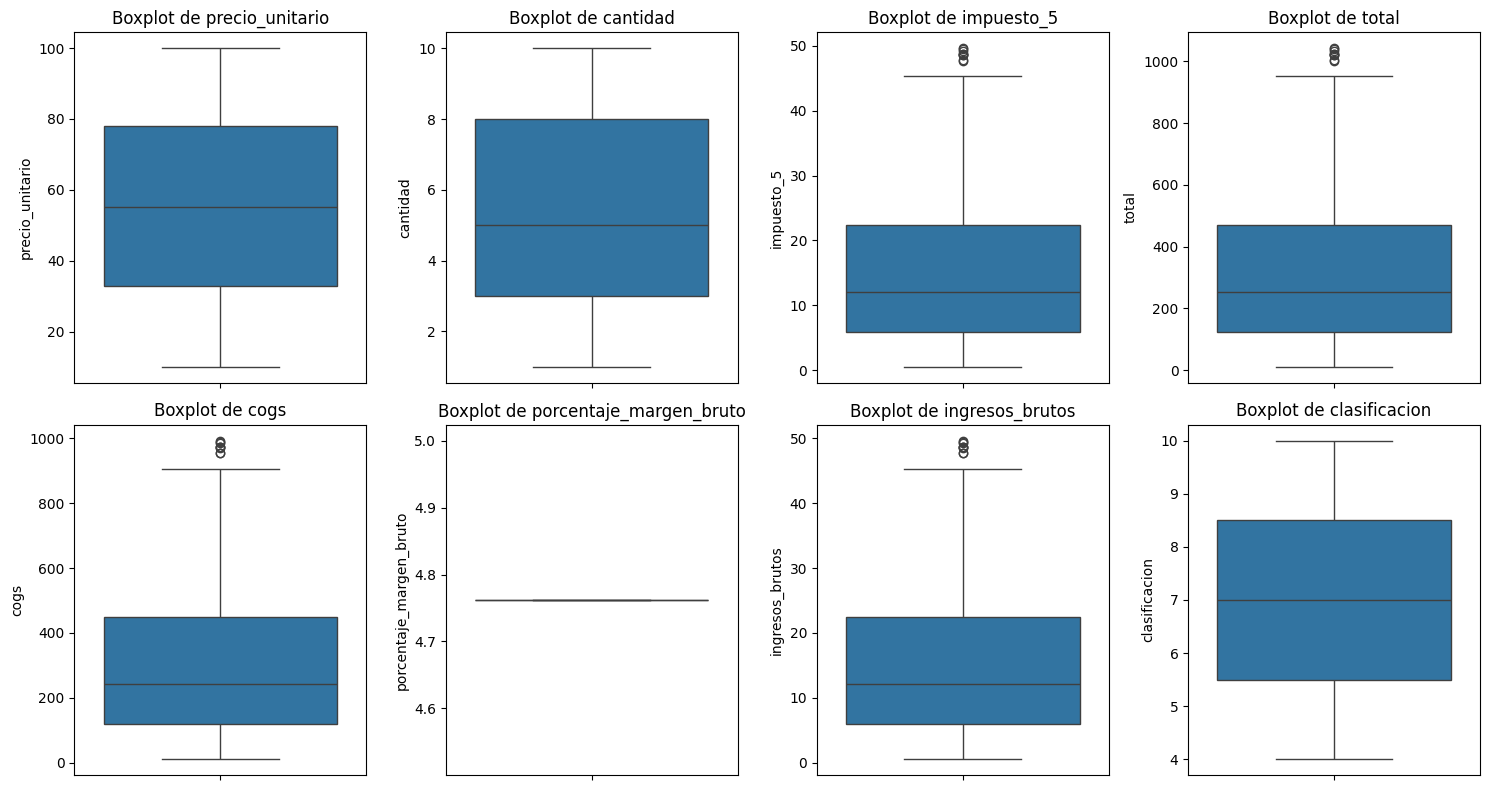

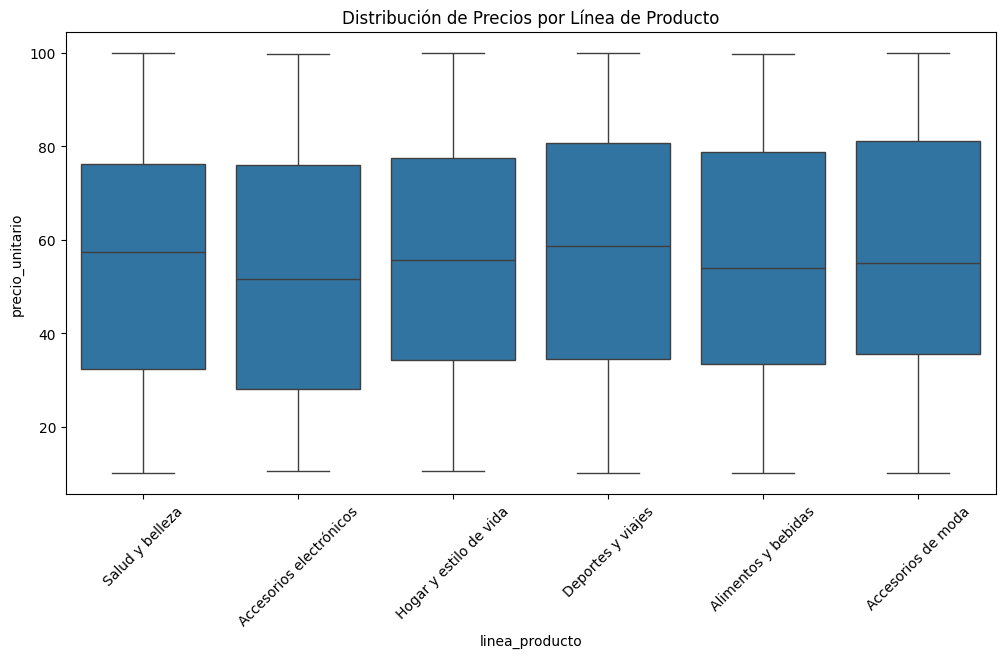

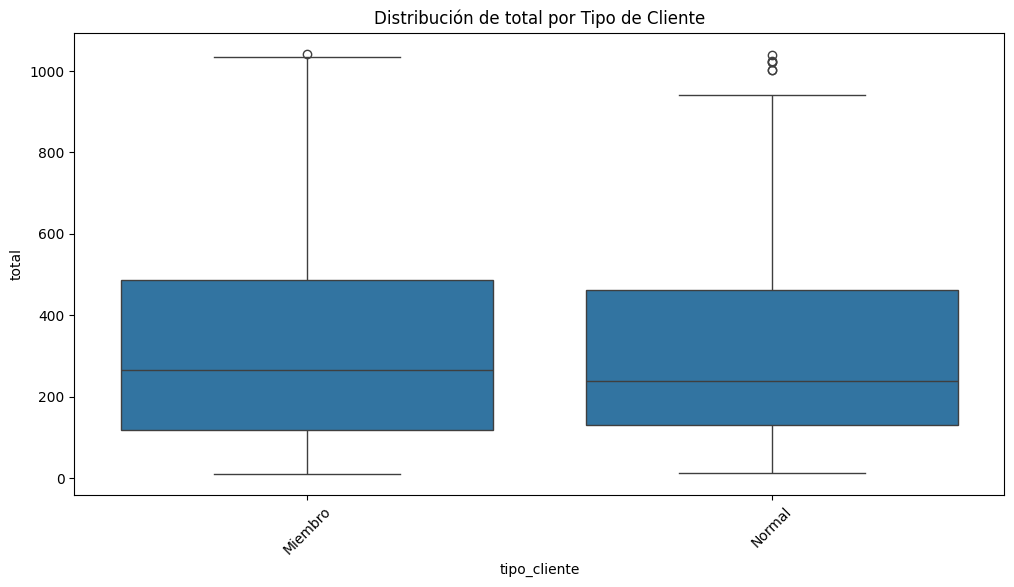

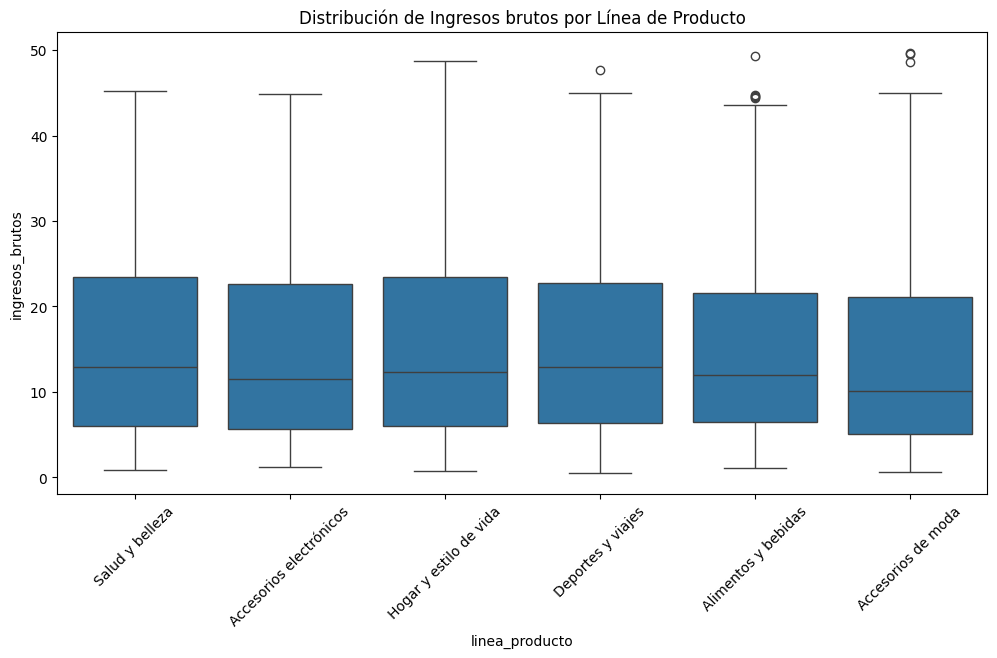

In [23]:

#Boxplots para cada variable numerica
plt.figure(figsize=(15, 8))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(2, 4, i)
    sns.boxplot(y=df_limpio[col])
    plt.title(f'Boxplot de {col}')
    plt.tight_layout()
plt.show()

# Graficos de dispercion para relaciones clave

# Boxplot de Distribución de Precios por Línea de Producto
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_limpio, x="linea_producto", y="precio_unitario")
plt.xticks(rotation=45)  # Rotar etiquetas del eje X
plt.title("Distribución de Precios por Línea de Producto")
plt.show()

# Boxplot por categorías (ejemplo con tipo_cliente)
plt.figure(figsize=(12, 6))
sns.boxplot(x='tipo_cliente', y='total', data=df_limpio)
plt.title('Distribución de total por Tipo de Cliente')
plt.xticks(rotation=45)
plt.show()

# Boxplot por línea de producto
plt.figure(figsize=(12, 6))
sns.boxplot(x='linea_producto', y='ingresos_brutos', data=df_limpio)
plt.title('Distribución de Ingresos brutos por Línea de Producto')
plt.xticks(rotation=45)
plt.show()


# 8. Imputacion de Variables

In [24]:
# El punto 5
# El punto 6 de valores nulos, no es tomado en cuenta ya que no hay valores nulos
print("\n--- Imputación de columnas---")
# Elimina columnas que no aportan valor predictivo directo o podrían inducir sesgo.
# Estas columnas pueden ser identificadores únicos o información redundante.

def imputacion_variables(df):
    columnas_eliminar = [
        'id_factura',    # ID único, no aporta valor para predicción
        'hora'         # Puede ser útil si se procesa, pero así cruda no sirve
    ]

    columnas_a_borrar = [col for col in columnas_eliminar if col in df.columns]

    df.drop(columns=columnas_a_borrar, inplace=True) # compara y elimina
    print(f"Columnas eliminadas: {columnas_a_borrar}")
    return df

#  Llama la funcion
df_limpio = imputacion_variables(df_limpio)
display(df_limpio.head())


--- Imputación de columnas---
Columnas eliminadas: ['id_factura', 'hora']


,sucursal,ciudad,tipo_cliente,sexo,linea_producto,precio_unitario,cantidad,impuesto_5,total,fecha,tipo_pago,cogs,porcentaje_margen_bruto,ingresos_brutos,clasificacion
0,A,Yangon,Miembro,Femenino,Salud y belleza,74.69,7,26.1415,548.9715,1/5/2019,Monedero electrónico,522.83,4.761905,26.1415,9.1
1,C,Naypyitaw,Normal,Femenino,Accesorios electrónicos,15.28,5,3.8200,80.2200,3/8/2019,Efectivo,76.40,4.761905,3.8200,9.6
2,A,Yangon,Normal,Masculino,Hogar y estilo de vida,46.33,7,16.2155,340.5255,3/3/2019,Tarjeta de crédito,324.31,4.761905,16.2155,7.4
3,A,Yangon,Miembro,Masculino,Salud y belleza,58.22,8,23.2880,489.0480,1/27/2019,Monedero electrónico,465.76,4.761905,23.2880,8.4
4,A,Yangon,Normal,Masculino,Deportes y viajes,86.31,7,30.2085,634.3785,2/8/2019,Monedero electrónico,604.17,4.761905,30.2085,5.3


# Histogramas y Agrupaciones

--- Calcular matriz de correlación---
                 cogs  impuesto_5  total  ingresos_brutos
cogs              1.0         1.0    1.0              1.0
impuesto_5        1.0         1.0    1.0              1.0
total             1.0         1.0    1.0              1.0
ingresos_brutos   1.0         1.0    1.0              1.0


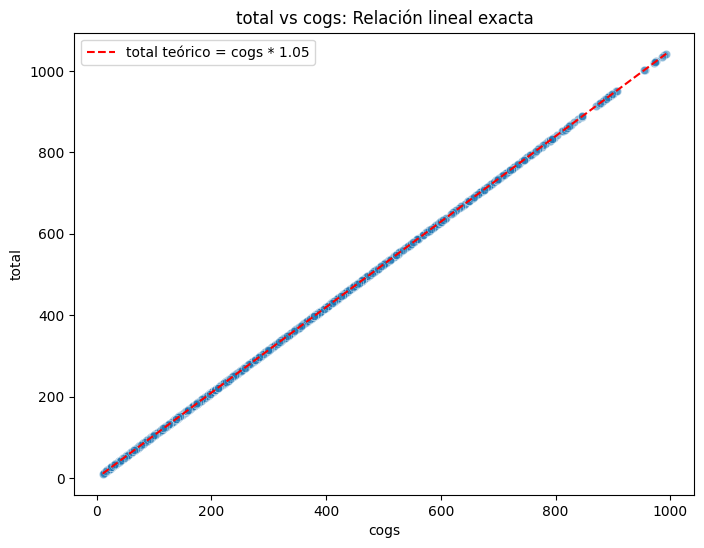

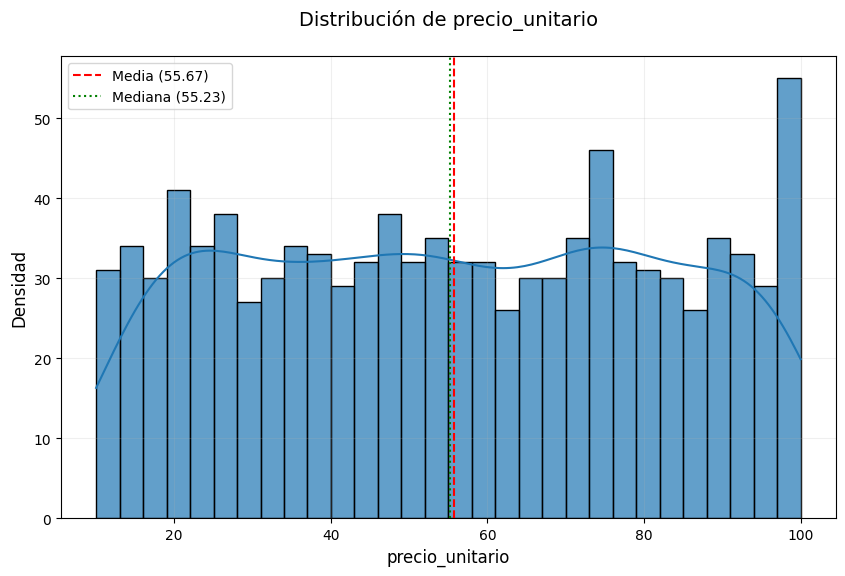


ANÁLISIS COMPLETO: PRECIO_UNITARIO
- Rango: [10.08, 99.96]
- Media: 55.67
- Mediana: 55.23
- Desviación Estándar: 26.49
- Sesgo: 0.01
- Curtosis: -1.22
  → Distribución aproximadamente simétrica, cola mas larga a la izquierda
  → Distribución PLATICÚRTICA (Más plana Cola delgada, valores mas concentrados)


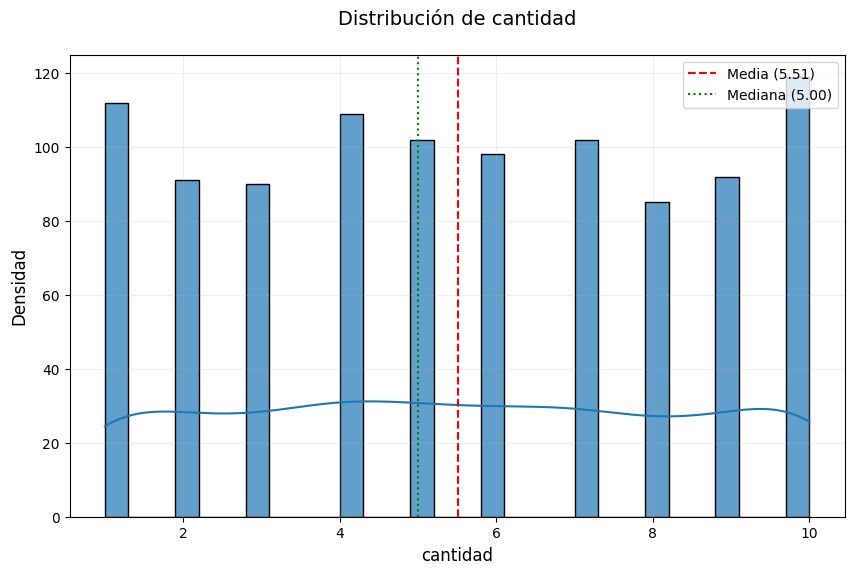


ANÁLISIS COMPLETO: CANTIDAD
- Rango: [1.00, 10.00]
- Media: 5.51
- Mediana: 5.00
- Desviación Estándar: 2.92
- Sesgo: 0.01
- Curtosis: -1.22
  → Distribución aproximadamente simétrica, cola mas larga a la izquierda
  → Distribución PLATICÚRTICA (Más plana Cola delgada, valores mas concentrados)


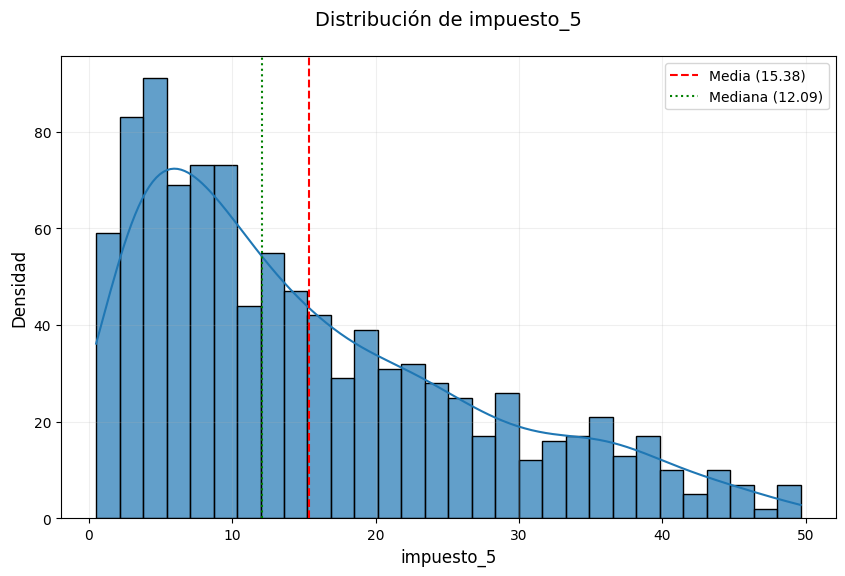


ANÁLISIS COMPLETO: IMPUESTO_5
- Rango: [0.51, 49.65]
- Media: 15.38
- Mediana: 12.09
- Desviación Estándar: 11.71
- Sesgo: 0.89
- Curtosis: -0.08
  → Distribución moderadamente sesgada, distribuion normal perfecta
  → Distribución MESOCÚRTICA (similar a la normal)


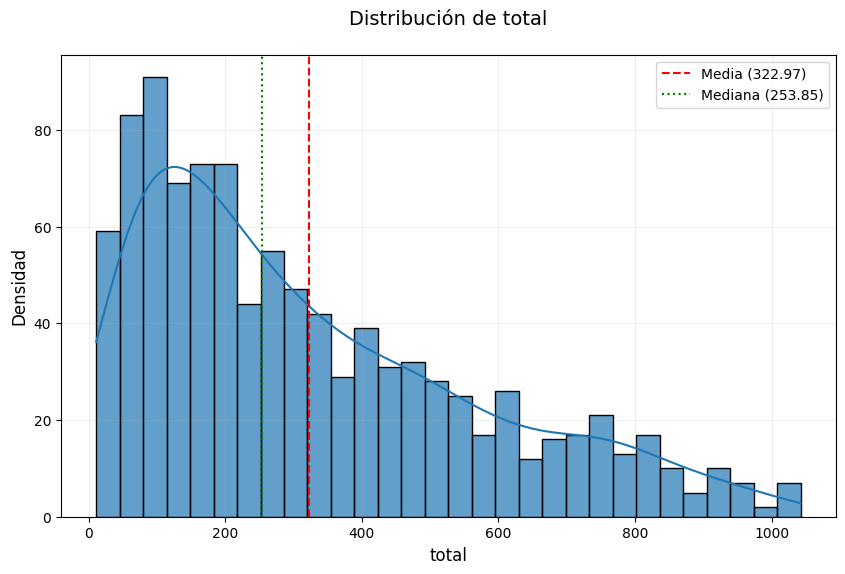


ANÁLISIS COMPLETO: TOTAL
- Rango: [10.68, 1042.65]
- Media: 322.97
- Mediana: 253.85
- Desviación Estándar: 245.89
- Sesgo: 0.89
- Curtosis: -0.08
  → Distribución moderadamente sesgada, distribuion normal perfecta
  → Distribución MESOCÚRTICA (similar a la normal)


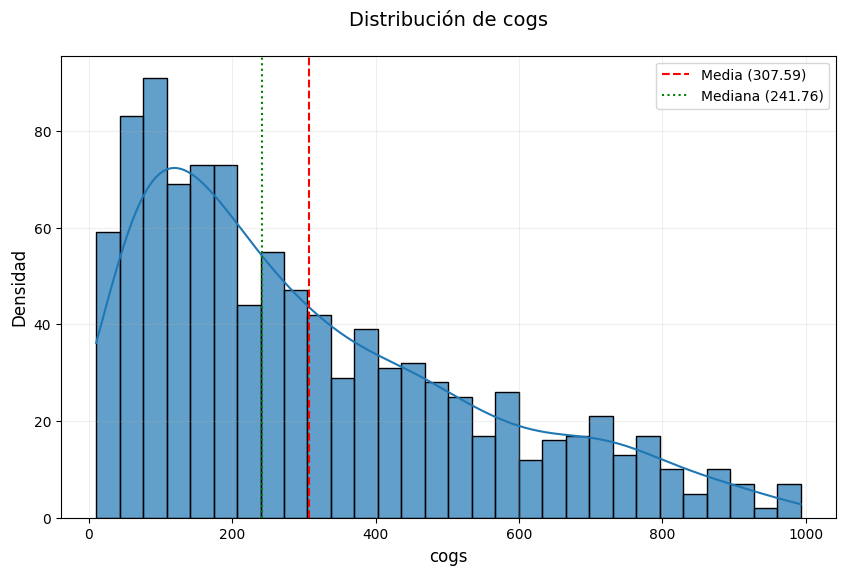


ANÁLISIS COMPLETO: COGS
- Rango: [10.17, 993.00]
- Media: 307.59
- Mediana: 241.76
- Desviación Estándar: 234.18
- Sesgo: 0.89
- Curtosis: -0.08
  → Distribución moderadamente sesgada, distribuion normal perfecta
  → Distribución MESOCÚRTICA (similar a la normal)


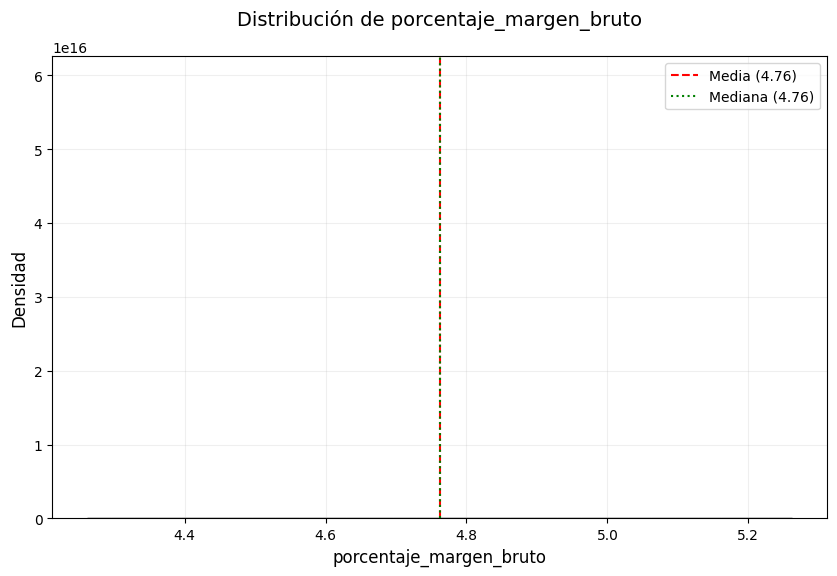


ANÁLISIS COMPLETO: PORCENTAJE_MARGEN_BRUTO
- Rango: [4.76, 4.76]
- Media: 4.76
- Mediana: 4.76
- Desviación Estándar: 0.00
- Sesgo: 0.00
- Curtosis: 0.00
  → Distribución aproximadamente simétrica, cola mas larga a la izquierda
  → Distribución MESOCÚRTICA (similar a la normal)


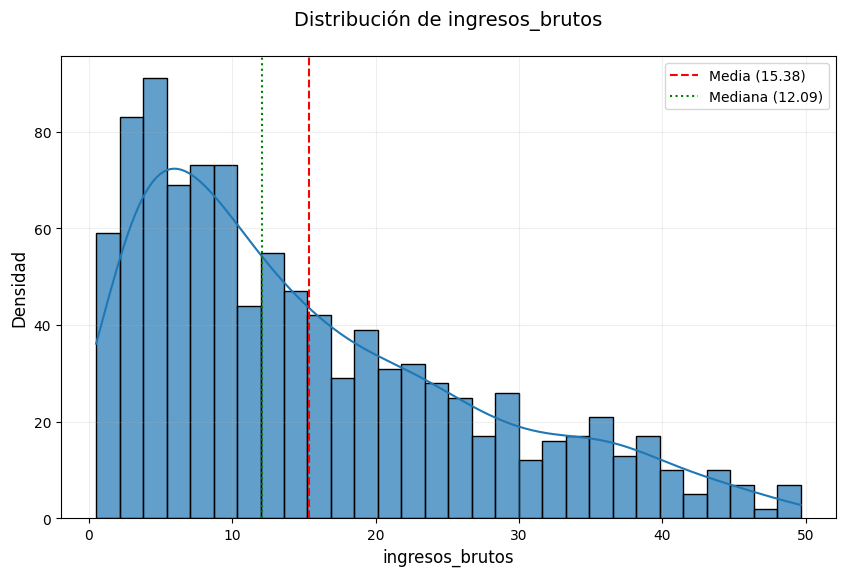


ANÁLISIS COMPLETO: INGRESOS_BRUTOS
- Rango: [0.51, 49.65]
- Media: 15.38
- Mediana: 12.09
- Desviación Estándar: 11.71
- Sesgo: 0.89
- Curtosis: -0.08
  → Distribución moderadamente sesgada, distribuion normal perfecta
  → Distribución MESOCÚRTICA (similar a la normal)


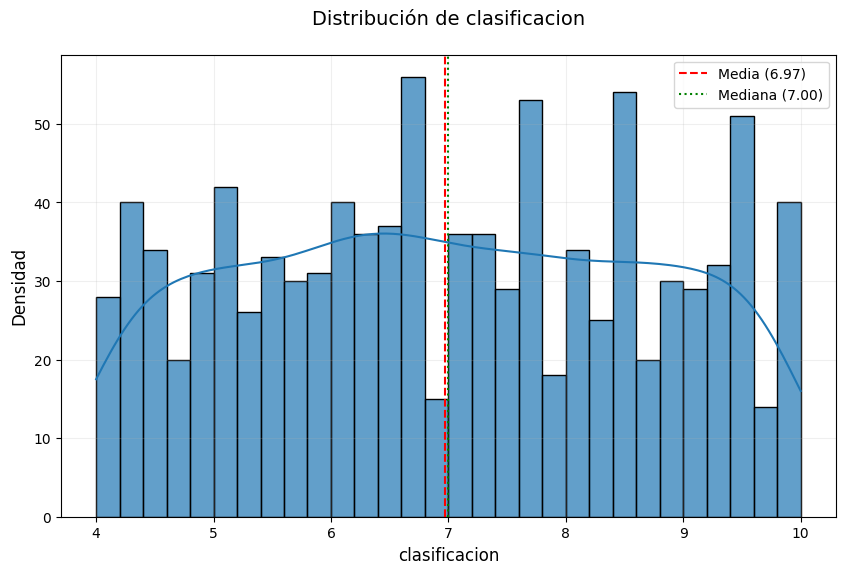


ANÁLISIS COMPLETO: CLASIFICACION
- Rango: [4.00, 10.00]
- Media: 6.97
- Mediana: 7.00
- Desviación Estándar: 1.72
- Sesgo: 0.01
- Curtosis: -1.15
  → Distribución aproximadamente simétrica, cola mas larga a la izquierda
  → Distribución PLATICÚRTICA (Más plana Cola delgada, valores mas concentrados)


In [25]:

## Verificar correlaciones numéricas
# Calcular matriz de correlación
# cogs = costo de bienes vendidos
print("--- Calcular matriz de correlación---")
corr_matrix = df_limpio[["cogs", "impuesto_5", "total", "ingresos_brutos"]].corr()
print(corr_matrix)


####
# Gráfico de dispersión: total vs cogs (Se muestra una relacion Linea exacta)
#Muestra una Relación Lineal Exacta, todos los puntos caen sobre la línea roja,
#confirma que total = cogs * 1.05 (es decir, el total es exactamente un 5% mayor que cogs).
#Esto sugiere que total es una variable derivada de cogs con un impuesto fijo del 5%.

plt.figure(figsize=(8, 6))
sns.scatterplot(data=df_limpio, x="cogs", y="total", alpha=0.5)
plt.title("total vs cogs: Relación lineal exacta")
plt.plot([df_limpio["cogs"].min(), df_limpio["cogs"].max()],
         [df_limpio["cogs"].min() * 1.05, df_limpio["cogs"].max() * 1.05],
         'r--', label="total teórico = cogs * 1.05")
plt.legend()
plt.show()

# Se excluyen columnas con datos redundantes y de diferencias, para una comparacion mas exacta
columns_to_exclude = [
    'impuesto_5',      # Redundante con cogs
    'ingresos_brutos',  # Redundante con total
    'total'           # Derivado de cogs
]

# visualización y análisis
def plot_enhanced_histogram(column, data):
    plt.figure(figsize=(10, 6))

    # Histograma con KDE
    sns.histplot(data[column], kde=True, color='#1f77b4', bins=30, alpha=0.7) #KDE linea que estima la densidad de probabilidad.

    # Líneas de referencia
    plt.axvline(data[column].mean(), color='red', linestyle='--', label=f'Media ({data[column].mean():.2f})') # indica la media aritmetica
    plt.axvline(data[column].median(), color='green', linestyle=':', label=f'Mediana ({data[column].median():.2f})') # Muestra la mediana

    # Personalizacion del grafico letra,tamano, etc
    plt.title(f'Distribución de {column}\n', fontsize=14)
    plt.xlabel(column, fontsize=12)
    plt.ylabel('Densidad', fontsize=12)
    plt.legend()
    plt.grid(True, alpha=0.2)
    plt.show()

    # Análisis estadístico completo
    print(f"\n{'='*60}")
    print(f"ANÁLISIS COMPLETO: {column.upper()}")
    print(f"{'='*60}")

    # Estadísticas básicas
    stats = {
        'Rango': f"[{data[column].min():.2f}, {data[column].max():.2f}]",
        'Media': f"{data[column].mean():.2f}",
        'Mediana': f"{data[column].median():.2f}",
        'Desviación Estándar': f"{data[column].std():.2f}",
        'Sesgo': f"{data[column].skew():.2f}",
        'Curtosis': f"{data[column].kurtosis():.2f}"
    }

    for stat, value in stats.items():
        print(f"- {stat}: {value}")

    # Interpretación del sesgo
    skewness = data[column].skew()
    if abs(skewness) > 1:
        print("  → Distribución ALTAMENTE SESGADA, cola mas larga a la derecha")
    elif abs(skewness) > 0.5:
        print("  → Distribución moderadamente sesgada, distribuion normal perfecta")
    else:
        print("  → Distribución aproximadamente simétrica, cola mas larga a la izquierda")

    # Interpretación de curtosis
    kurt = data[column].kurtosis()
    if kurt > 1:
        print("  → Distribución LEPTOCÚRTICA (Más picuda que la normal Cola gruesa, valores extremos mas probables)")
    elif kurt < -1:
        print("  → Distribución PLATICÚRTICA (Más plana Cola delgada, valores mas concentrados)")
    else:
        print("  → Distribución MESOCÚRTICA (similar a la normal)")

    print("="*60)

# Generar análisis para cada columna relevante
for col in numeric_cols:
    plot_enhanced_histogram(col, df_limpio)


# 10. Conversion de variables categoricas a numericas

In [26]:
#Se almacenara en una df llamado= df_estandarizado

# Muestra las columnas categoricas
categorical_cols = df_limpio.select_dtypes(include=['object']).columns
print("Columnas categóricas:\n")
print(categorical_cols)
print(df_limpio.head())

print("\nColumna sucursal sin cambios:\n")
print(df_limpio['sucursal'])

#IMPORTANTE SOLO EJECUTARLO UNA VEZ
# Copiar df_limpio para no modificar el original
df_estandarizado = df_limpio.copy()

print("\n--- Cambia valor categórico a numérico ---\n")
df_estandarizado['sucursal'] = df_estandarizado['sucursal'].map({'A': 1, 'B': 2, 'C': 3})

print("\nColumna sucursal con cambios:\n")
print(df_estandarizado['sucursal'])



Columnas categóricas:

Index(['sucursal', 'ciudad', 'tipo_cliente', 'sexo', 'linea_producto', 'fecha',
       'tipo_pago'],
      dtype='object')
  sucursal     ciudad tipo_cliente       sexo           linea_producto  \
0        A     Yangon      Miembro   Femenino          Salud y belleza   
1        C  Naypyitaw       Normal   Femenino  Accesorios electrónicos   
2        A     Yangon       Normal  Masculino   Hogar y estilo de vida   
3        A     Yangon      Miembro  Masculino          Salud y belleza   
4        A     Yangon       Normal  Masculino        Deportes y viajes   

   precio_unitario  cantidad  impuesto_5     total      fecha  \
0            74.69         7     26.1415  548.9715   1/5/2019   
1            15.28         5      3.8200   80.2200   3/8/2019   
2            46.33         7     16.2155  340.5255   3/3/2019   
3            58.22         8     23.2880  489.0480  1/27/2019   
4            86.31         7     30.2085  634.3785   2/8/2019   

              tipo

# 11. Estandarizacion y normalizacion

In [27]:
#print(df_estandarizado.columns)
print("\nColumna linea_producto:\n")
print(df_estandarizado['linea_producto'].unique())
print("\nPrueba linea_producto:\n")
# Paso 1: Normalizar texto (eliminar espacios, formato título y manejar nulos)
df_estandarizado['linea_producto'] = (
    df_estandarizado['linea_producto']
    .fillna('NULO')  # Opcional: manejo de nulos
    .astype(str)
    .str.strip()               # Elimina espacios en extremos
    .str.title()               # Formato "Título Capitalizado"
)

# Paso 2: Mapear categorías a códigos numéricos.
mapeo_linea_producto = {
    'Salud Y Belleza': 0,
    'Accesorios Electrónicos': 1,
    'Hogar Y Estilo De Vida': 2,
    'Deportes Y Viajes': 3,
    'Alimentos Y Bebidas': 4,
    'Accesorios De Moda': 5,
    'NULO': -1       # Valor por defecto para nulos.
}

df_estandarizado['linea_producto'] = df_estandarizado['linea_producto'].map(mapeo_linea_producto)

# Verificación
print(df_estandarizado['linea_producto'].unique())

# PRUEBA #2 ciudad
#Nota no necesita normalizar los datos porque no posee espacios.

mapeo_ciudad = {
    'Yangon': 0,
    'Naypyitaw': 2,
    'Mandalay': 2
}

df_estandarizado['ciudad'] = df_estandarizado['ciudad'].map(mapeo_ciudad)

# Verificación
print(df_estandarizado['ciudad'].unique())
display(df_estandarizado['ciudad'])

# PRUEBA #3 tipo_pago
# Paso 1: Normalizar texto (eliminar espacios, formato título y manejar nulos)
df_estandarizado['tipo_pago'] = (
    df_estandarizado['tipo_pago']
    .fillna('NULO')  # Opcional: manejo de nulos
    .str.strip()               # Elimina espacios en extremos
    .str.title()               # Formato "Título Capitalizado"
)
# PRUEBA #3 tipo_pago
# Paso 2: Mapear categorías a códigos numéricos.
mapeo_tipo_pago = {
    'Monedero Electrónico': 0,
    'Efectivo': 1,
    'Tarjeta De Crédito': 2
}

df_estandarizado['tipo_pago'] = df_estandarizado['tipo_pago'].map(mapeo_tipo_pago)

# Verificación
print(df_estandarizado['tipo_pago'].unique())
display(df_estandarizado['tipo_pago'])

#
# Normalizar fecha a 0 y 1
# Convertir la columna fecha
df_estandarizado['fecha'] = pd.to_datetime(df_estandarizado['fecha'], format='mixed', dayfirst=True, errors='coerce')

# Calcular los días desde la fecha mínima
df_estandarizado['dias_desde_inicio'] = (df_estandarizado['fecha'] - df_estandarizado['fecha'].min()).dt.days

# Normalizar entre 0 y 1
scaler = MinMaxScaler()
df_estandarizado['fecha'] = scaler.fit_transform(df_estandarizado[['dias_desde_inicio']])

# Insertar la columna justo después de 'total'
columna_total_idx = df_estandarizado.columns.get_loc('total')
cols = list(df_estandarizado.columns)

# Mover 'fecha_normalizada' a la posición deseada
cols.insert(columna_total_idx + 1, cols.pop(cols.index('fecha')))
df_estandarizado = df_estandarizado[cols]

# Eliminar columnas temporales
df_estandarizado.drop(['dias_desde_inicio'], axis=1, inplace=True)

# Mostrar una vista previa
display(df_estandarizado.head())


Columna linea_producto:

['Salud y belleza' 'Accesorios electrónicos' 'Hogar y estilo de vida'
 'Deportes y viajes' 'Alimentos y bebidas' 'Accesorios de moda']

Prueba linea_producto:

[0 1 2 3 4 5]
[0 2]


,ciudad
0,0
1,2
2,0
3,0
4,0
...,...
995,2
996,2
997,0
998,0


[0 1 2]


,tipo_pago
0,0
1,1
2,2
3,0
4,0
...,...
995,0
996,0
997,1
998,1


,sucursal,ciudad,tipo_cliente,sexo,linea_producto,precio_unitario,cantidad,impuesto_5,total,fecha,tipo_pago,cogs,porcentaje_margen_bruto,ingresos_brutos,clasificacion
0,1,0,Miembro,Femenino,0,74.69,7,26.1415,548.9715,0.357143,0,522.83,4.761905,26.1415,9.1
1,3,2,Normal,Femenino,1,15.28,5,3.8200,80.2200,0.636905,1,76.40,4.761905,3.8200,9.6
2,1,0,Normal,Masculino,2,46.33,7,16.2155,340.5255,0.181548,2,324.31,4.761905,16.2155,7.4
3,1,0,Miembro,Masculino,0,58.22,8,23.2880,489.0480,0.077381,0,465.76,4.761905,23.2880,8.4
4,1,0,Normal,Masculino,3,86.31,7,30.2085,634.3785,0.633929,0,604.17,4.761905,30.2085,5.3


In [ ]:
display(df_estandarizado.head())
print(df_estandarizado.head())

,sucursal,ciudad,tipo_cliente,sexo,linea_producto,precio_unitario,cantidad,impuesto_5,total,fecha,tipo_pago,cogs,porcentaje_margen_bruto,ingresos_brutos,clasificacion
0,1,0,Miembro,Femenino,0,74.69,7,26.1415,548.9715,0.357143,0,522.83,4.761905,26.1415,9.1
1,3,2,Normal,Femenino,1,15.28,5,3.8200,80.2200,0.636905,1,76.40,4.761905,3.8200,9.6
2,1,0,Normal,Masculino,2,46.33,7,16.2155,340.5255,0.181548,2,324.31,4.761905,16.2155,7.4
3,1,0,Miembro,Masculino,0,58.22,8,23.2880,489.0480,0.077381,0,465.76,4.761905,23.2880,8.4
4,1,0,Normal,Masculino,3,86.31,7,30.2085,634.3785,0.633929,0,604.17,4.761905,30.2085,5.3


   sucursal  ciudad tipo_cliente       sexo  linea_producto  precio_unitario  \
0         1       0      Miembro   Femenino               0            74.69   
1         3       2       Normal   Femenino               1            15.28   
2         1       0       Normal  Masculino               2            46.33   
3         1       0      Miembro  Masculino               0            58.22   
4         1       0       Normal  Masculino               3            86.31   

   cantidad  impuesto_5     total     fecha  tipo_pago    cogs  \
0         7     26.1415  548.9715  0.357143          0  522.83   
1         5      3.8200   80.2200  0.636905          1   76.40   
2         7     16.2155  340.5255  0.181548          2  324.31   
3         8     23.2880  489.0480  0.077381          0  465.76   
4         7     30.2085  634.3785  0.633929          0  604.17   

   porcentaje_margen_bruto  ingresos_brutos  clasificacion  
0                 4.761905          26.1415            9.1  


In [28]:
# Codificación binaria
# Cambia columnas categoricas a numericas, sexo, M= 0 F= 1, Tipo_cliente = Normal = 0, Member =1
print("\nVariables Categóricas a Binarias\n")
df_estandarizado['sexo'] = df_estandarizado['sexo'].fillna('Masculino').str.strip().str.title().map({'Masculino': 0, 'Femenino': 1})
df_estandarizado['tipo_cliente'] = df_estandarizado['tipo_cliente'].fillna('Normal').str.strip().str.title().map({'Normal': 0, 'Miembro': 1})
print(df_estandarizado[['sexo', 'tipo_cliente']].head())


# Seleccionamos solo las columnas numéricas
numeric_cols = df_estandarizado.select_dtypes(include=['float64', 'int64']).columns

# Creamos el normalizador
scaler = MinMaxScaler()

# Aplicamos la normalización
df_estandarizado[numeric_cols] = scaler.fit_transform(df_estandarizado[numeric_cols])

# Verificamos los resultados
print(df_estandarizado[numeric_cols].head())
print(df_estandarizado.head())

display(df_estandarizado.head())


Variables Categóricas a Binarias

   sexo  tipo_cliente
0     1             1
1     1             0
2     0             0
3     0             1
4     0             0
   sucursal  ciudad  tipo_cliente  sexo  linea_producto  precio_unitario  \
0       0.0     0.0           1.0   1.0             0.0         0.718847   
1       1.0     1.0           0.0   1.0             0.2         0.057855   
2       0.0     0.0           0.0   0.0             0.4         0.403316   
3       0.0     0.0           1.0   0.0             0.0         0.535603   
4       0.0     0.0           0.0   0.0             0.6         0.848131   

   cantidad  impuesto_5     total     fecha  tipo_pago      cogs  \
0  0.666667    0.521616  0.521616  0.357143        0.0  0.521616   
1  0.444444    0.067387  0.067387  0.636905        0.5  0.067387   
2  0.666667    0.319628  0.319628  0.181548        1.0  0.319628   
3  0.777778    0.463549  0.463549  0.077381        0.0  0.463549   
4  0.666667    0.604377  0.604377  0

,sucursal,ciudad,tipo_cliente,sexo,linea_producto,precio_unitario,cantidad,impuesto_5,total,fecha,tipo_pago,cogs,porcentaje_margen_bruto,ingresos_brutos,clasificacion
0,0.0,0.0,1.0,1.0,0.0,0.718847,0.666667,0.521616,0.521616,0.357143,0.0,0.521616,0.0,0.521616,0.850000
1,1.0,1.0,0.0,1.0,0.2,0.057855,0.444444,0.067387,0.067387,0.636905,0.5,0.067387,0.0,0.067387,0.933333
2,0.0,0.0,0.0,0.0,0.4,0.403316,0.666667,0.319628,0.319628,0.181548,1.0,0.319628,0.0,0.319628,0.566667
3,0.0,0.0,1.0,0.0,0.0,0.535603,0.777778,0.463549,0.463549,0.077381,0.0,0.463549,0.0,0.463549,0.733333
4,0.0,0.0,0.0,0.0,0.6,0.848131,0.666667,0.604377,0.604377,0.633929,0.0,0.604377,0.0,0.604377,0.216667


# 12.Correlacion de las variables

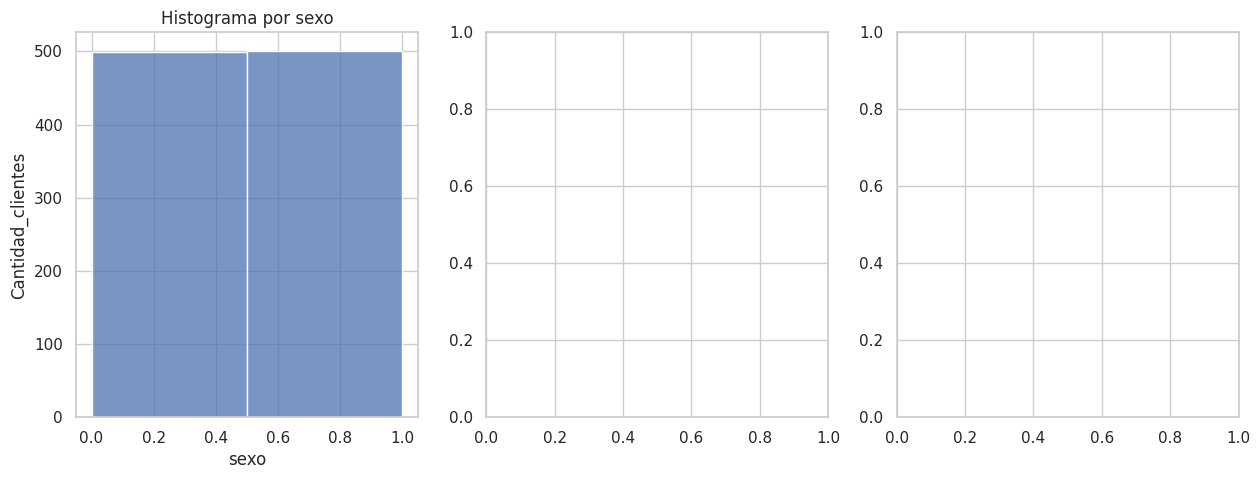

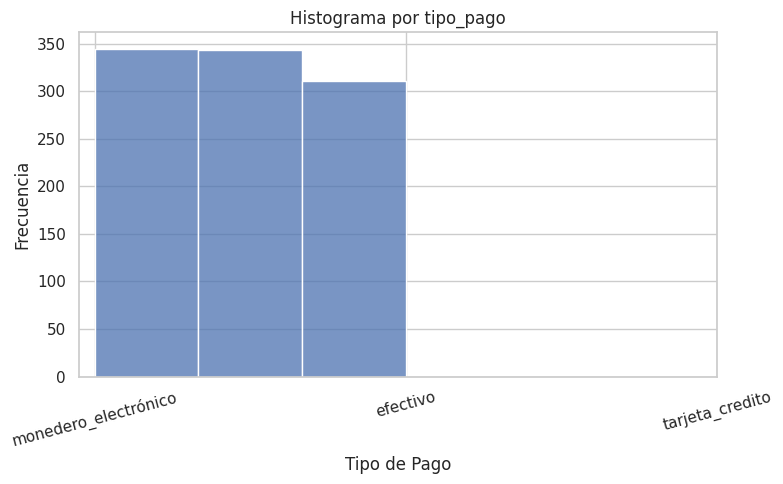


 Boxplot por Sexo y total 



<ipython-input-48-ba17e0427141>:47: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


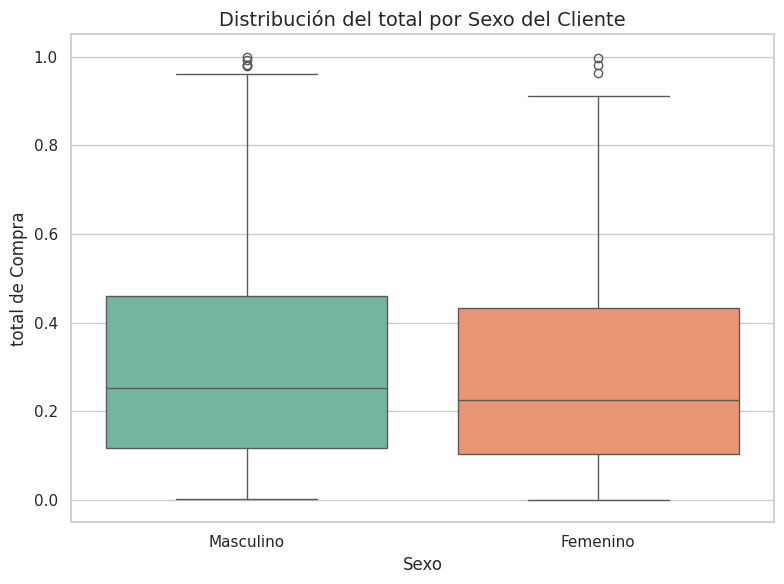

,sucursal,ciudad,tipo_cliente,sexo,linea_producto,precio_unitario,cantidad,impuesto_5,total,fecha,tipo_pago,cogs,porcentaje_margen_bruto,ingresos_brutos,clasificacion
0,0.0,0.0,1.0,1.0,0.0,0.718847,0.666667,0.521616,0.521616,0.357143,0.0,0.521616,0.0,0.521616,0.850000
1,1.0,1.0,0.0,1.0,0.2,0.057855,0.444444,0.067387,0.067387,0.636905,0.5,0.067387,0.0,0.067387,0.933333
2,0.0,0.0,0.0,0.0,0.4,0.403316,0.666667,0.319628,0.319628,0.181548,1.0,0.319628,0.0,0.319628,0.566667
3,0.0,0.0,1.0,0.0,0.0,0.535603,0.777778,0.463549,0.463549,0.077381,0.0,0.463549,0.0,0.463549,0.733333
4,0.0,0.0,0.0,0.0,0.6,0.848131,0.666667,0.604377,0.604377,0.633929,0.0,0.604377,0.0,0.604377,0.216667


In [48]:
df_estandarizado.corr(numeric_only=True)

# Estilo para los gráficos
sns.set(style="whitegrid")

# Graficar Histogramas por variable
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

# Histograma por 'Sexo' muestra los clientes por sexo
# la sucursal 0 tiene mas clientes
sns.histplot(df_estandarizado['sexo'], kde=False, bins=2, ax=axs[0])
axs[0].set_title('Histograma por sexo')
axs[0].set_xlabel('sexo')
axs[0].set_ylabel('Cantidad_clientes')

# Histograma por 'Tipo_Pago' muestra  la frecuencia de tipo de pagos tarjeta efectivo etc
sns.set(style="whitegrid")

# Crear el histograma
plt.figure(figsize=(8, 5))
sns.histplot(df_estandarizado['tipo_pago'], bins=3, kde=False)

# Configurar etiquetas personalizadas
plt.title('Histograma por tipo_pago')
plt.xlabel('Tipo de Pago')
plt.ylabel('Frecuencia')
plt.xticks(rotation=15)
plt.xticks(
    ticks=[0, 1, 2],
    labels=['monedero_electrónico', 'efectivo', 'tarjeta_credito']
)

plt.tight_layout()
plt.show()

print("\n Boxplot por Sexo y total \n")

# Estilo general
sns.set(style="whitegrid")

# Crear figura
plt.figure(figsize=(8, 6))

##### Mapeo inline sin modificar el DataFrame
sexo_mapeado = df_estandarizado['sexo'].map({0: 'Femenino', 1: 'Masculino'})

sns.boxplot(
    x=sexo_mapeado,
    y=df_estandarizado['total'],
    palette='Set2'
)

# Títulos y etiquetas
plt.title('Distribución del total por Sexo del Cliente', fontsize=14)
plt.xlabel('Sexo', fontsize=12)
plt.ylabel('total de Compra', fontsize=12)
plt.xticks(fontsize=11)
plt.yticks(fontsize=11)

plt.tight_layout()
plt.show()

display(df_estandarizado.head())


# 13. Variable Dependiente

In [30]:

# 13. Variable dependiente y modelo candidato

# Tras el análisis exploratorio del conjunto de datos, se determinó que la variable dependiente principal es total,
# ya que representa el monto total pagado por una transacción, incluyendo impuestos y cantidad de productos adquiridos.
# Esta variable es numérica continua, lo que la hace ideal para aplicar modelos de regresión supervisada.

# total está influenciada por múltiples variables independientes como:

# Tipo de producto, cantidad, Precio unitario, ciudad, Tipo de cliente, Método de pago, fecha y hora.

# Esto permite usarla para:

# Estimar ingresos por cliente o producto
# Predecir ventas futuras o patrones de consumo
# Identificar comportamientos de gasto según sucursal, horario o perfil del cliente
# Diseñar estrategias comerciales y de marketing

# Modelos de regresión aplicables:

# Regresión lineal múltiple.        	    Útil para entender relaciones lineales entre variables.
# Árbol de regresión.	                    Permite modelar relaciones no lineales y es fácil de interpretar.
# Random Forest.	                        Muy robusto, maneja gran cantidad de variables y reduce el sobreajuste.


# Otras posibles variables dependientes:

# Rating

# También es numérica continua, por lo tanto, se puede aplicar regresión.
# Permite evaluar la calidad del servicio o la experiencia del cliente.
# Útil para análisis de satisfacción o percepción del usuario.

# Modelos aplicables:
# los mismos de regresión mencionados anteriormente.

# tipo_pago

# Es una variable categórica (Efectivo, Tarjeta, Ewallet, etc.).
# Se puede predecir con clasificación supervisada, ideal para anticipar métodos de pago más utilizados.

# Modelos aplicables:
# Regresión logística multiclase.
# Árboles de decisión.
# Random Forest.



#14. Conjunto de Datos listo para Analisis

In [ ]:
# Exportar a csv.

# df_estandarizado.to_csv('df_analisis.csv', index=False)

# files.download('df_analisis.csv')

# Exporta a xlsx.

df_estandarizado.to_excel('df_analisis.xlsx', index=False)  # Nombre del archivo corregido

files.download('df_analisis.xlsx')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# Eliminar columnas similares al total antes de entrenar el random forest

In [40]:
# Variables que probocan el data leakage
variables_a_eliminar = ['cogs', 'impuesto_5', 'ingresos_brutos', 'porcentaje_margen_bruto']

# Elimina las variables de X
X = df_estandarizado.drop(['total'] + variables_a_eliminar, axis=1)

# Variable dependiente
y = df_estandarizado['total']

# Ahora divide normalmente
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Entrena
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predicce
y_pred = rf_model.predict(X_test)

# Evaluación
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"Error cuadratico Medio (MSE): {mse:.4f}")
print(f"Raiz error cuadratico medio (RMSE): {rmse:.4f}")
print(f"Coeficiente de Determinación (R²): {r2:.4f}")


Error cuadratico Medio (MSE): 0.0001
Raiz error cuadratico medio (RMSE): 0.0098
Coeficiente de Determinación (R²): 0.9984


# Random Forest, con todos los datos
este codigo predice el 100%, ya que tiene todas las columnas
y crea una formula exacta para saber que va a pasar.


In [31]:

from sklearn.model_selection import train_test_split # divide los datos en entrenamiento y prueba
from sklearn.ensemble import RandomForestRegressor # busqueda aleatoria
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np # para sacar raiz cuadrada


# Define las variables independientes (X) y la variable dependiente (y)
X = df_estandarizado.drop('total', axis=1)  # Todas las columnas excepto 'total'
y = df_estandarizado['total']

# Divide los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) # X_train, y_train= esto entrena
                                                                                          # X_test, y_test = esto evalua

# Crea y entrena el modelo RandomForest
rf_model = RandomForestRegressor(n_estimators=100, random_state=42) # Ajusta n_estimators según sea necesario
rf_model.fit(X_train, y_train)


############# PARTE DE PREDICCION DE LOS DATOS ###############################3


# Realiza predicciones en el conjunto de prueba
y_pred = rf_model.predict(X_test)

# Evalúa el modelo
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

# f delante del texto es para formatear las variables con los valores.
print(f"Error cuadratico Medio (MSE): {mse:.4f}")   # Indica que casi no hay error cuadratico medio.
print(f"Raiz error cuadratico medio (RMSE): {rmse:.4f}") # El error promedio es bajo.
print(f"Coeficiente de Determinación (R²): {r2:.4f}") # El modelo explica practicamente el 100% de variabilidad.
print("Variables usadas en el modelo:", X_train.columns.tolist()) # Muestra las variables utilizadas para el entrenamiento

Error cuadratico Medio (MSE): 0.0000
Raiz error cuadratico medio (RMSE): 0.0013
Coeficiente de Determinación (R²): 1.0000
Variables usadas en el modelo: ['sucursal', 'ciudad', 'tipo_cliente', 'sexo', 'linea_producto', 'precio_unitario', 'cantidad', 'impuesto_5', 'fecha', 'tipo_pago', 'cogs', 'porcentaje_margen_bruto', 'ingresos_brutos', 'clasificacion']


PRUEBA DE PASO 3 Y 4

In [41]:

# Mostrar primeras 10 predicciones vs valores reales
predicciones = pd.DataFrame({
    'Real': y_test.values,
    'Predicho': y_pred
})

print(predicciones.head(10))

print("\nRevierte la normalizacion y compara las variables con lo original y lo que se predijo \n")

# Obtiene el mínimo y máximo de 'total' original
min_total = df_limpio['total'].min()
max_total = df_limpio['total'].max()

# Revierte la normalización, para hacer una comparacion con valores mas entendibles
y_test_original = y_test * (max_total - min_total) + min_total
y_pred_original = y_pred * (max_total - min_total) + min_total

# Muestra la comparacion del real con el predecido
comparacion = pd.DataFrame({
    'Real (Total)': y_test_original,
    'Predicho (Total)': y_pred_original
})

# Mostrar las primeras 10 filas
display(comparacion.head(10))


       Real  Predicho
0  0.497390  0.502813
1  0.587518  0.547083
2  0.385723  0.388214
3  0.120814  0.123830
4  0.034156  0.035036
5  0.589451  0.549648
6  0.113519  0.111622
7  0.698676  0.675879
8  0.425811  0.429432
9  0.123501  0.114107

Revierte la normalizacion y compara las variables con lo original y lo que se predijo 



,Real (Total),Predicho (Total)
521,523.9710,529.567290
737,616.9800,575.252895
740,408.7335,411.304635
660,135.3555,138.467910
411,45.9270,46.834935
678,618.9750,577.899210
626,127.8270,125.868960
513,731.6925,708.166620
859,450.1035,453.840345
136,138.1275,128.433270


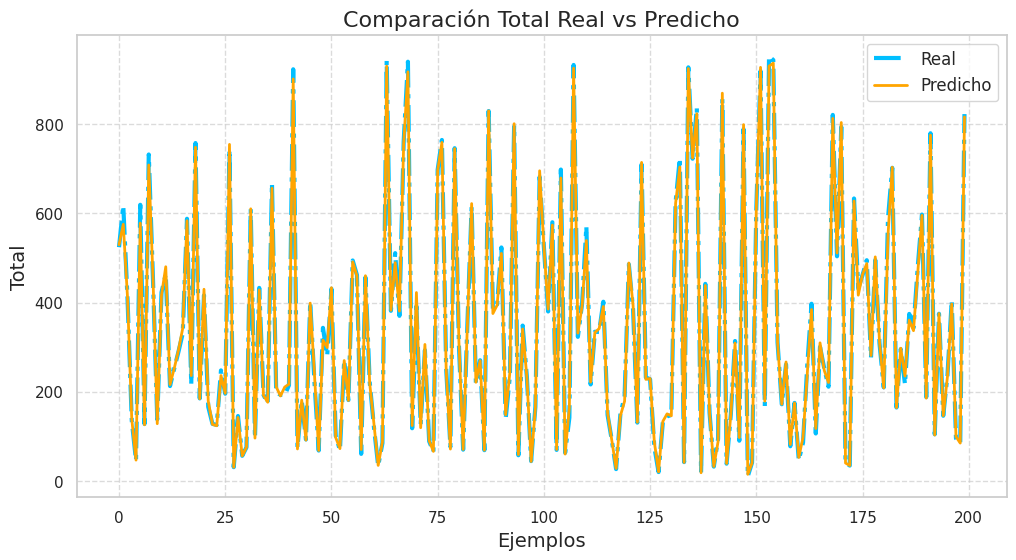

In [42]:
# Visualizacion
plt.figure(figsize=(12,6))

# Curva de valores reales
plt.plot(
    y_test_original.values,
    label='Real',
    color='deepskyblue',    # Azul más brillante
    linewidth=3,            # Línea más gruesa
    linestyle='-.'          # Línea combinada: puntos y rayas
)

# Curva de valores predichos
plt.plot(
    y_pred_original,
    label='Predicho',
    color='orange',
    linewidth=2
)

plt.legend(fontsize=12)
plt.title('Comparación Total Real vs Predicho', fontsize=16)
plt.xlabel('Ejemplos', fontsize=14)
plt.ylabel('Total', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()



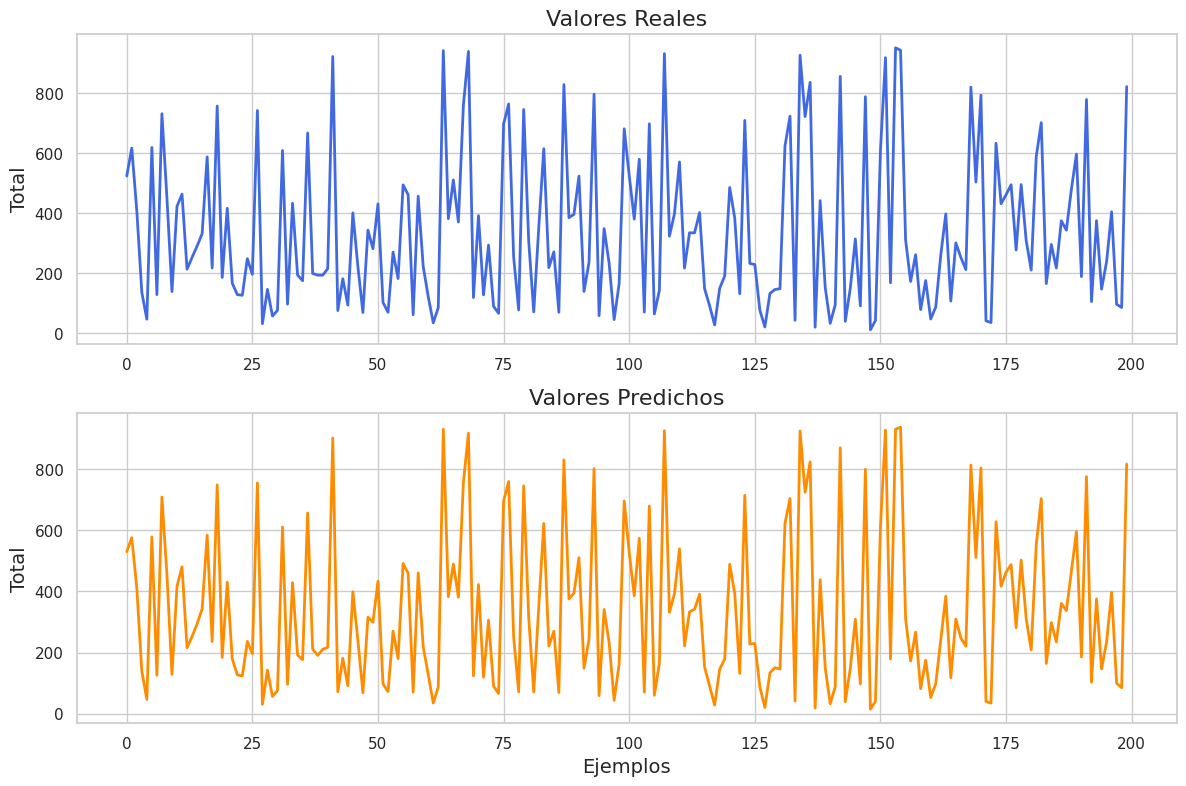

In [43]:
# Grafico comparativo de valores

# Crear la figura
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12,8))  # 2 filas, 1 columna

# Primer gráfico: valores reales
ax1.plot(y_test_original.values, color='royalblue', linewidth=2)
ax1.set_title('Valores Reales', fontsize=16)
ax1.set_ylabel('Total', fontsize=14)
ax1.grid(True)

# Segundo gráfico: valores predichos
ax2.plot(y_pred_original, color='darkorange', linewidth=2)
ax2.set_title('Valores Predichos', fontsize=16)
ax2.set_xlabel('Ejemplos', fontsize=14)
ax2.set_ylabel('Total', fontsize=14)
ax2.grid(True)

# Ajustar el espaciado
plt.tight_layout(pad=1)
plt.show()



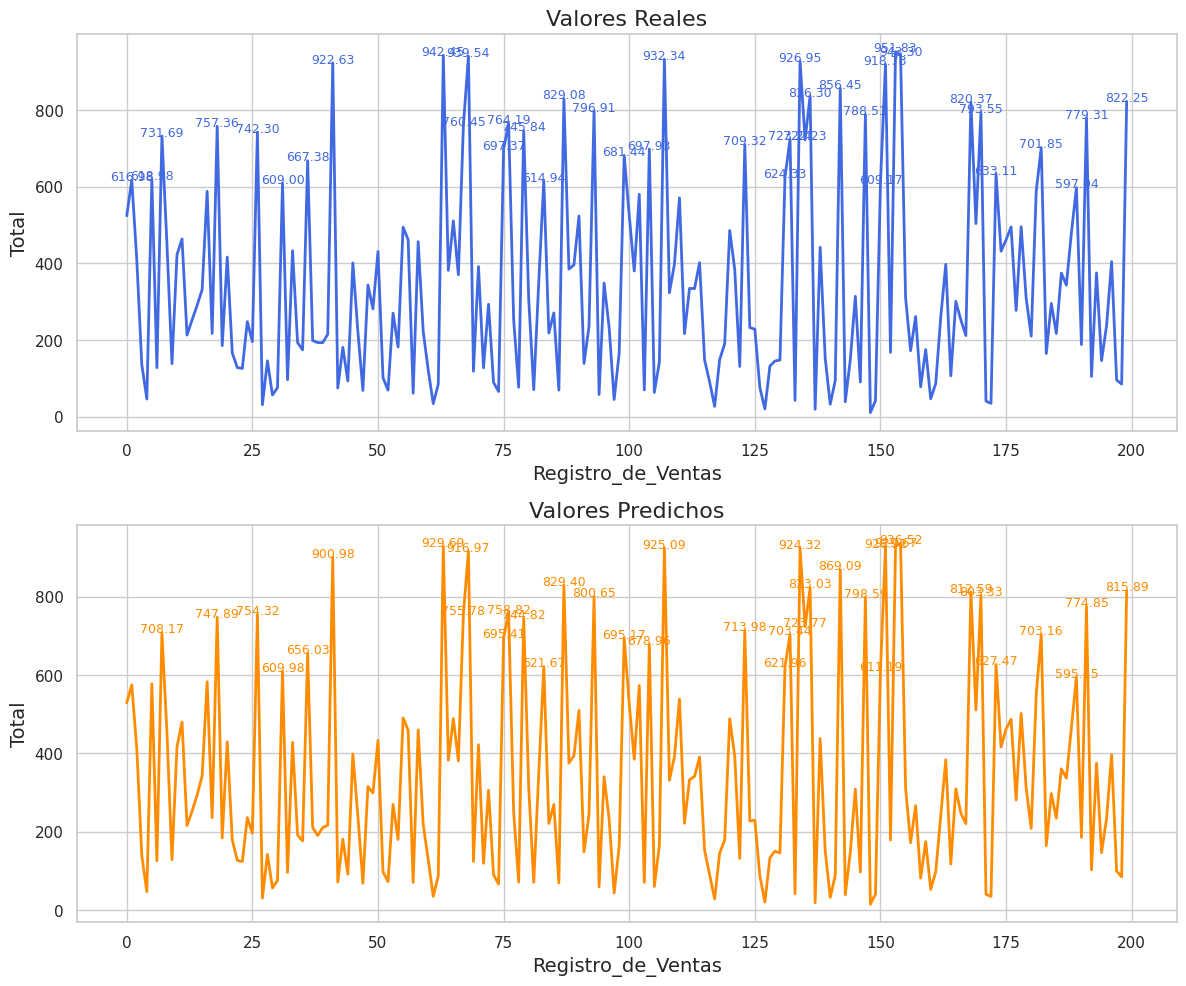

In [44]:
# Grafico con valores numericos

# Crear la figura
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12,10))  # 2 filas, 1 columna

# Primer gráfico: valores reales
ax1.plot(y_test_original.values, color='royalblue', linewidth=2)
ax1.set_title('Valores Reales', fontsize=16)
ax1.set_xlabel('Registro_de_Ventas', fontsize=14)
ax1.set_ylabel('Total', fontsize=14)
ax1.grid(True)

# Agrega los valores en los picos altos del gráfico de valores reales
for i, value in enumerate(y_test_original.values):
    if value > y_test_original.values.mean() + y_test_original.values.std():  # Condición: pico alto
        ax1.annotate(f'{value:.2f}', xy=(i, value), xytext=(i, value + 0.02),
                     ha='center', fontsize=9, color='royalblue')

# Segundo gráfico: valores predichos
ax2.plot(y_pred_original, color='darkorange', linewidth=2)
ax2.set_title('Valores Predichos', fontsize=16)
ax2.set_xlabel('Registro_de_Ventas', fontsize=14)
ax2.set_ylabel('Total', fontsize=14)
ax2.grid(True)

# Agrega los valores en los picos altos del gráfico de valores predichos
for i, value in enumerate(y_pred_original):
    if value > y_pred_original.mean() + y_pred_original.std():  # Condición: pico alto
        ax2.annotate(f'{value:.2f}', xy=(i, value), xytext=(i, value + 0.02),
                     ha='center', fontsize=9, color='darkorange')

plt.tight_layout(pad=1)
plt.show()


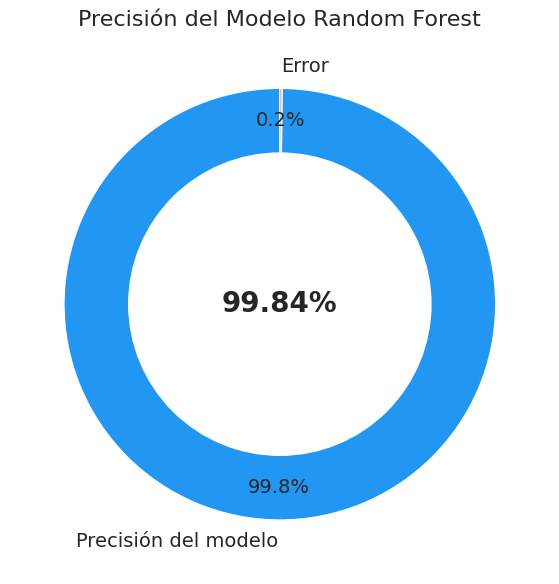

In [45]:

# Calcula el porcentaje de predicción a partir de R²
r2 = r2_score(y_test, y_pred)
porcentaje_prediccion = r2 * 100  #Se pasa a  porcentaje

# Creamos los datos para el gráfico de dona
valores = [porcentaje_prediccion, 100 - porcentaje_prediccion]
colors = ['#2196F3', '#FF5722']  # azul para precisión, rojo para error

# Crear el gráfico
fig, ax = plt.subplots(figsize=(8, 6))
wedges, texts, autotexts = ax.pie(
    valores, labels=labels, colors=colors, startangle=90,
    autopct='%1.1f%%', pctdistance=0.85, textprops={'fontsize': 14}
)

# Crear un círculo en el medio (efecto "dona")
centro_circulo = plt.Circle((0, 0), 0.70, fc='white')
fig.gca().add_artist(centro_circulo)

# Agregar el porcentaje de predicción en el centro
plt.text(0, 0, f"{porcentaje_prediccion:.2f}%", ha='center', va='center', fontsize=20, fontweight='bold')

# Título
plt.title('Precisión del Modelo Random Forest', fontsize=16)
plt.tight_layout()
plt.show()
